<a href="https://colab.research.google.com/github/xh313/TidyTuesdayWithPython/blob/main/TidyTuesday01022022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import nltk
nltk.download("punkt")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Importing needed libraries
import numpy as np
from random import *
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import seaborn as sns
import pandas as pd
import math
from collections import Counter
import csv

np.set_printoptions(suppress=True) # makes tiny values appear as zero
np.set_printoptions(precision=4)   # number of digits in floats (or longfloats)

# Importing data
infile = open('/content/drive/My Drive/TidyTuesday/breeds.csv', 'r')
raw = infile.read()

# Unify the types
kw = np.array(['Hairless', 'Wiry', 'Smooth', 'Silky', 'Curly', 'Double', 'Rough'])
for i in range(len(kw)):
  raw = raw.replace(kw[i], str(i))

cl = np.array(['Short', 'Medium', 'Long'])
for i in range(len(cl)):
  raw = raw.replace(cl[i], str(i))


# Inspecting
tokenized = nltk.tokenize.word_tokenize(raw)
c = Counter(tokenized)
#print(c) # Frequency of each type

#Saving
with open("raw.txt", "w") as o:
    o.write(raw)

breeds = np.genfromtxt('raw.txt', dtype=int, delimiter=',', usecols=np.arange(0,17), skip_header=1)
#print(breeds)

In [ ]:
# Manipulating data
#breeds = breeds[:,1:] # Deleting the first column
friend = breeds[:, [1,2,3,9,10,11,12,13,14,15]] # Extract cols that are correlated with friendliness
friendc = (friend-3) / 2 # Center on zero and normalize
friendc[len(friendc)-1] = friendc[len(friendc)-1] * (-1) # Invert the barking level parameter
#print(friendc)


fluffy = breeds[:, [4,5,7,8]] # Extract cols that are correlated with fluffiness
fluffy[:,[0,1]] = (fluffy[:,[0,1]]-3) / 2
fluffy[:, 2] = (fluffy[:, 2]-3) / 3
fluffy[:, 3] = fluffy[:, 3]-1. # All for normalization
#print(fluffy)

In [ ]:
# Sum all data into new parameters and 1D array

#print(friendc.shape[0] == fluffy.shape[0])

types = friendc.shape[0] # Number of types of dog breeds
sum_friend = np.zeros(types)  # Create an empty array with an entry reserved for each breed that shows the parameter of friendliness
sum_fluffy = np.zeros(types)  # Create an empty array with an entry reserved for each breed that shows the parameter of fluffiness
names = np.zeros(types, dtype=object)  # Create an empty array with entries reserved for breed names

for i in range(types):
  sum_friend[i] = np.sum(friendc[i, 0:1]) * 0.9 + np.sum(friendc[i, 1:2]) * 0.8 + np.sum(friendc[i, 2:3]) * 0.7 + np.sum(friendc[i, 3:6]) * 1.2 + np.sum(friendc[i, 6:8]) * 1.6 + np.sum(friendc[i, 8:]) * 0.4

for i in range(types):
  sum_fluffy[i] = np.sum(fluffy[i, 0:2]) * 0.7 + np.sum(fluffy[i, 2:3]) * 1.1 + np.sum(fluffy[i, 3:]) * 1.5

with open("/content/drive/My Drive/TidyTuesday/breeds.csv", "r", newline="") as file:
    reader = csv.reader(file, delimiter=",")
    counter = -1
    for row in reader:
      names[counter] = row[0]
      if counter < types-1:
        counter = counter + 1

# Normalize
sum_friend = sum_friend / 15
sum_fluffy = sum_fluffy / 5

In [ ]:
# Near points detector to deal with overlapping points

def uniqueness(index):
  counter = 0
  for j in range(0, index) and range(index + 1, types):
    #if sum_fluffy[j] <= sum_fluffy[index] <= sum_fluffy[j] + 0.04 and sum_friend[j] - 0.003 <= sum_friend[index] <= sum_friend[j]:
    if sum_fluffy[j] == sum_fluffy[index] and sum_friend[j] == sum_friend[index]:
      counter = counter + 1
  return counter

In [ ]:
# Miscell. design settings
import matplotlib as mpl

mpl.font_manager.fontManager.addfont('/content/drive/MyDrive/Avenir.ttc')
mpl.rc('font', family='Avenir')  # Changing all runtime fonts into Avenir

findfont: Font family ['Avenir'] not found. Falling back to DejaVu Sans.


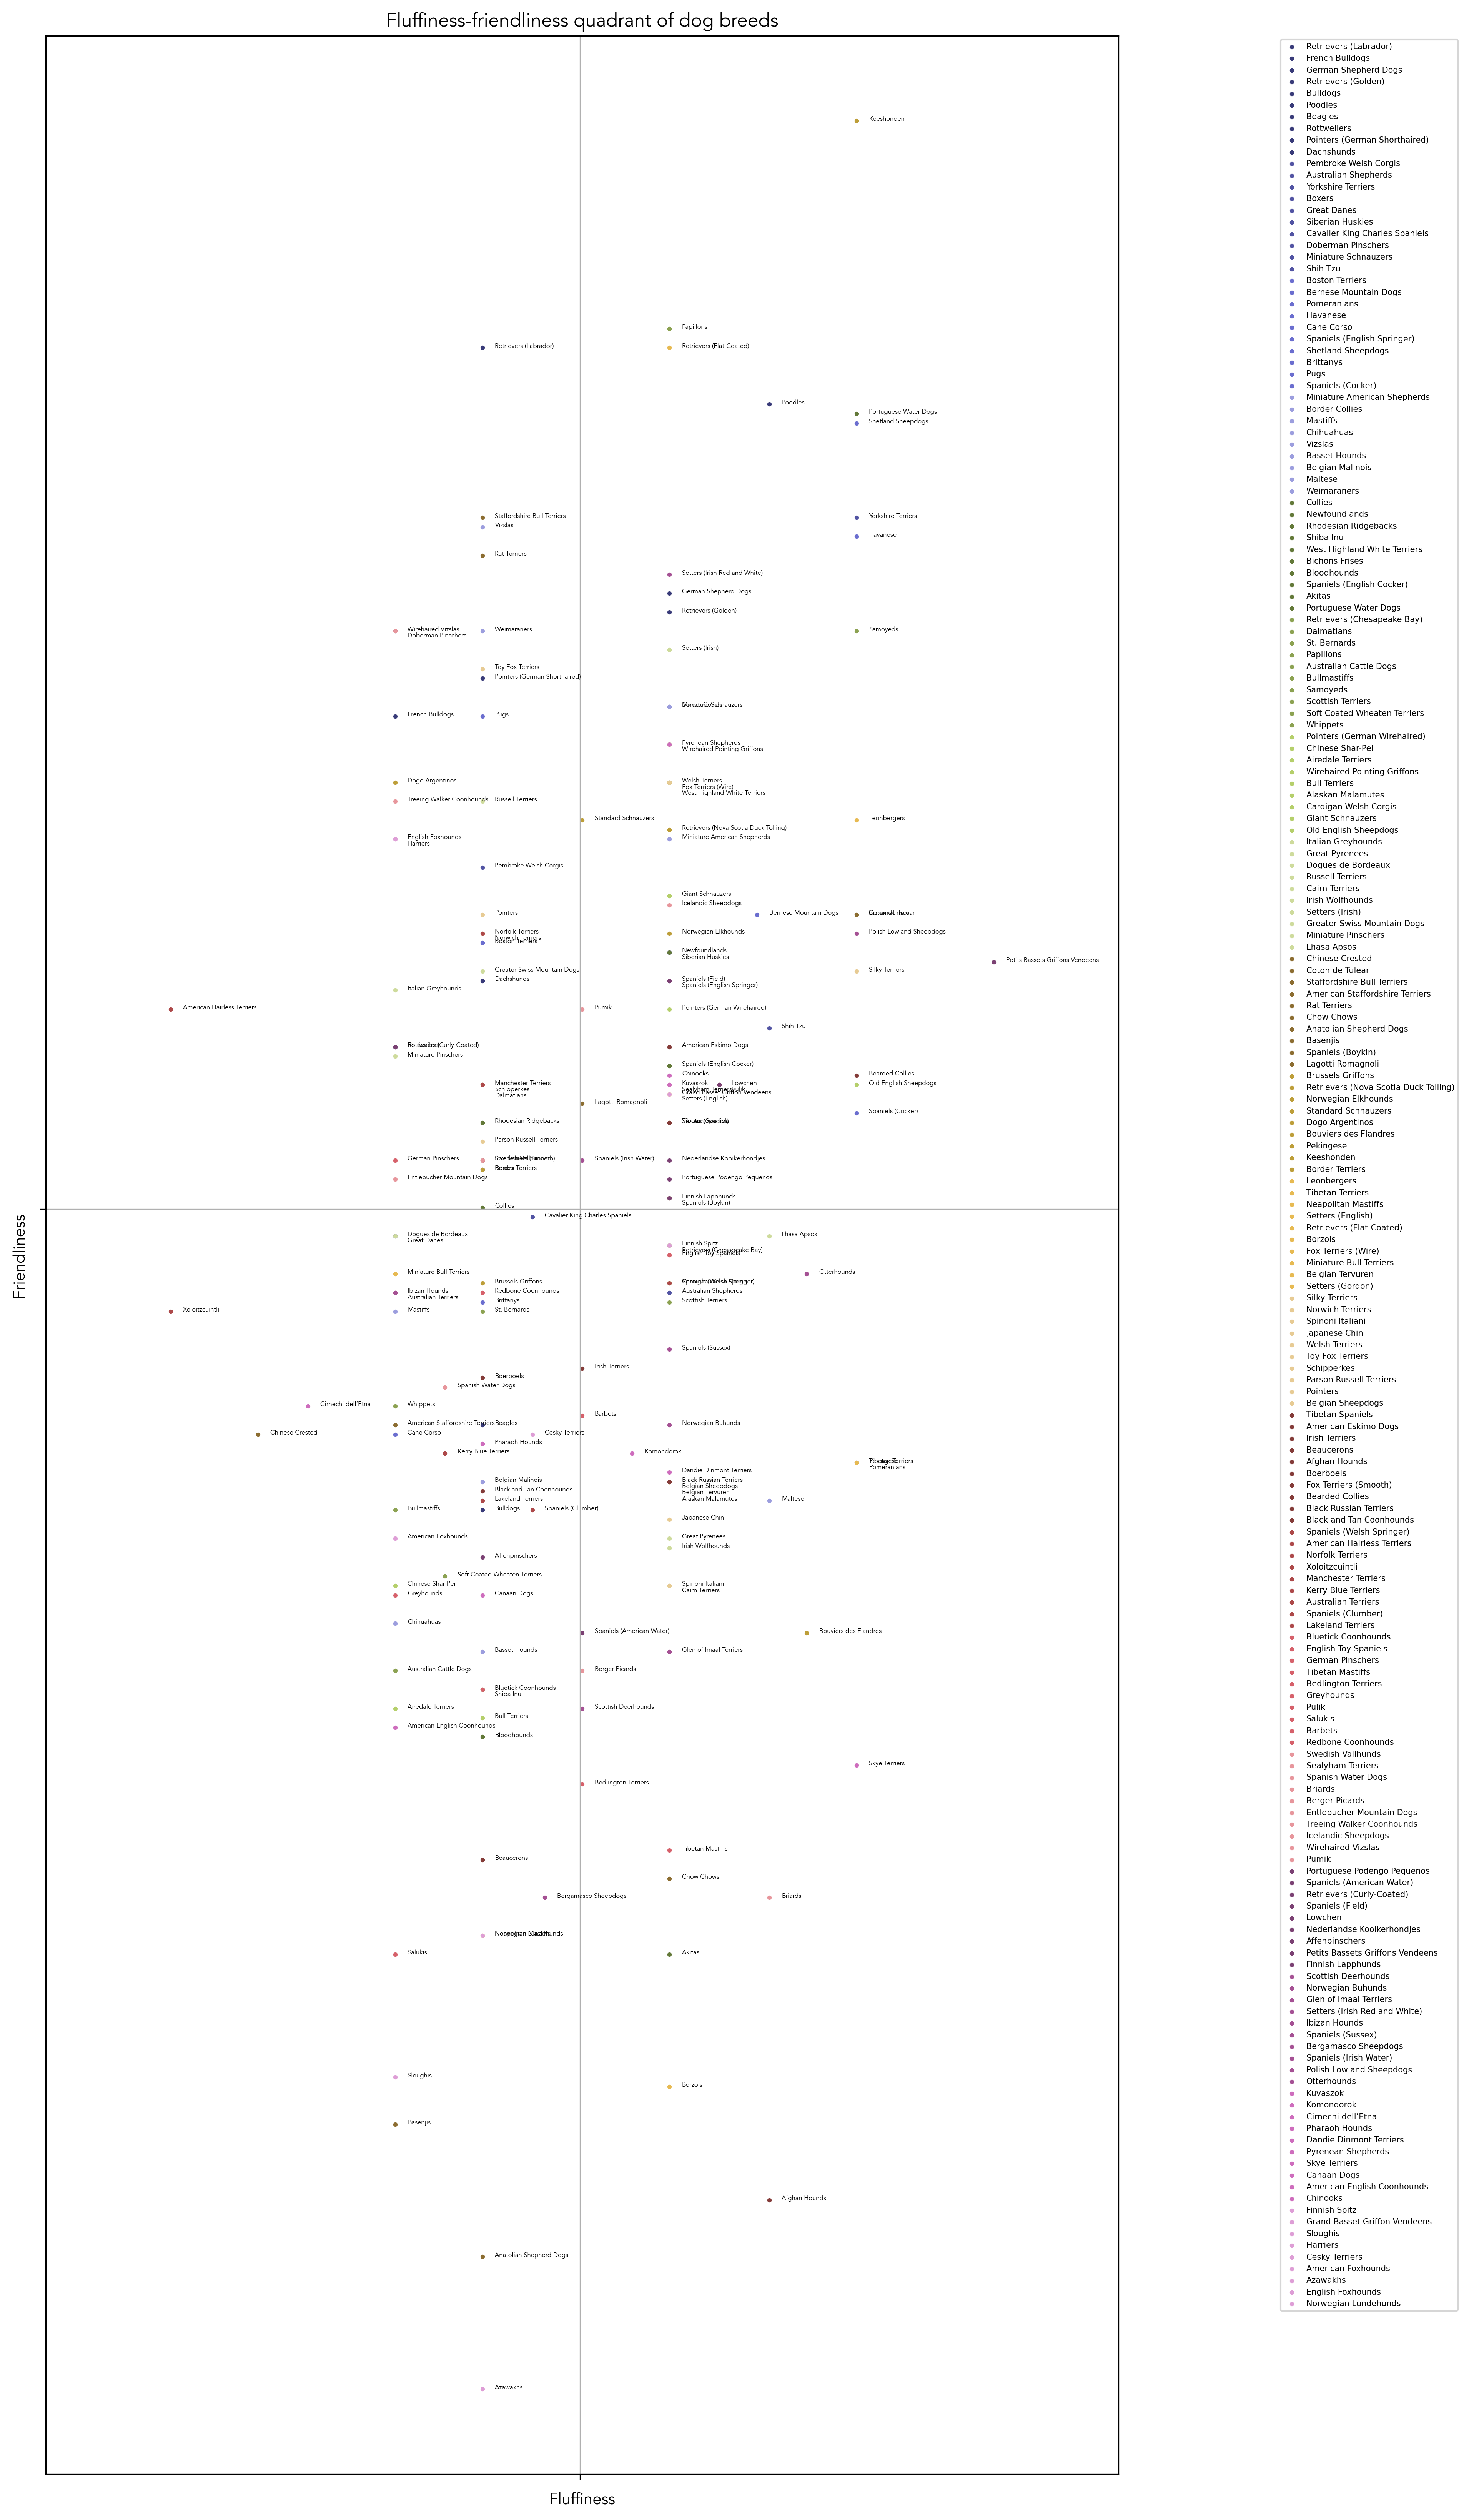

In [ ]:
# Plotting
plt.figure(figsize=[12,28], dpi=300, facecolor='w', edgecolor='k')

def colors(ordinal):
  return plt.cm.tab20b(ordinal/types)  # To create the effect of one color per point in the palette

for i in range(types):
  plt.scatter(sum_fluffy[i], sum_friend[i], color=colors(i), s=3, label=names[i])

#df=pd.DataFrame({'x': sum_fluffy, 'y': sum_friend })
#sns.stripplot(data=df, x="x", y="y", jitter=0.2, size=3, palette='viridis')

plt.xlabel('Fluffiness')
plt.ylabel('Friendliness')
plt.xlim((min(sum_fluffy) - 0.2, max(sum_fluffy) + 0.2))
plt.ylim((min(sum_friend) - 0.03, max(sum_friend) + 0.03))
plt.xticks([np.mean(sum_fluffy)], [])
plt.yticks([np.mean(sum_friend)], [])
plt.grid()
plt.legend(bbox_to_anchor=(max(sum_fluffy)-.2, 0, 1, 1), fontsize=5)
plt.title('Fluffiness-friendliness quadrant of dog breeds')
#ax.Axes.set_position(, [0,0], which='both')

#'''
for i, txt in enumerate(names):
#  if uniqueness(i) <= 0:
    plt.annotate(txt, (sum_fluffy[i] + 0.02, 
                       sum_friend[i] - 0.0022 * float(uniqueness(i))),  # To spread out the labels
                 fontsize=4, backgroundcolor=[1,1,1,0.])

#'''

plt.show()